### 必要な関数＆ライブラリのインポート

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
np.random.seed(0)

# 操作変数法

In [3]:
n_sample = 1000

X = np.random.normal(loc=0, scale=1, size=n_sample)
Z = np.random.normal(loc=5, scale=1, size=n_sample)

T = 6.0 - 0.4*Z + 0.5*X + np.random.normal(loc=0, scale=1, size=n_sample)
Y = 2.5 + 0.1*T + 0.4*X + np.random.normal(loc=0, scale=1, size=n_sample)

df = pd.DataFrame({
    'X': X,
    'Z': Z,
    'T': T,
    'Y': Y
})

df

,X,Z,T,Y
0,1.764052,5.555963,3.126720,5.111567
1,0.400157,5.892474,2.131119,3.441897
2,0.978738,4.577685,4.704430,3.247451
3,2.240893,5.104714,4.120187,4.060006
4,1.867558,5.228053,4.761746,2.512342
...,...,...,...,...
995,0.412871,5.097751,6.246512,2.785910
996,-0.198399,6.401523,2.432725,4.443472
997,0.094192,5.158434,3.791318,2.886236
998,-1.147611,3.858099,2.670439,3.885088


In [4]:
# 観測できないXと処置変数Tで重回帰分析を行った場合

X = df[['T', 'X']]
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.74e-41
Time:                        15:15:27   Log-Likelihood:                -1434.6
No. Observations:                1000   AIC:                             2875.
Df Residuals:                     997   BIC:                             2890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4671      0.127     19.379      0.000       2.217       2.717
T              0.1036      0.031      3.317      0.001       0.042       0.165
X              0.4064      0.036     11.345      0.000       0.336       0.477
==============================================================================
Omnibus:                        3.918   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.856
Skew:                           0.116   Prob(JB):                        0.145
Kurtosis:                       3.196   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 処置変数のみで単回帰分析を行った場合

X = df[['T']]
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     68.99
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           3.19e-16
Time:                        15:15:27   Log-Likelihood:                -1495.3
No. Observations:                1000   AIC:                             2995.
Df Residuals:                     998   BIC:                             3004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8719      0.123     15.195      0.000       1.630       2.114
T              0.2508      0.030      8.306      0.000       0.192       0.310
==============================================================================
Omnibus:                        1.772   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.633
Skew:                           0.075   Prob(JB):                        0.442
Kurtosis:                       3.129   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

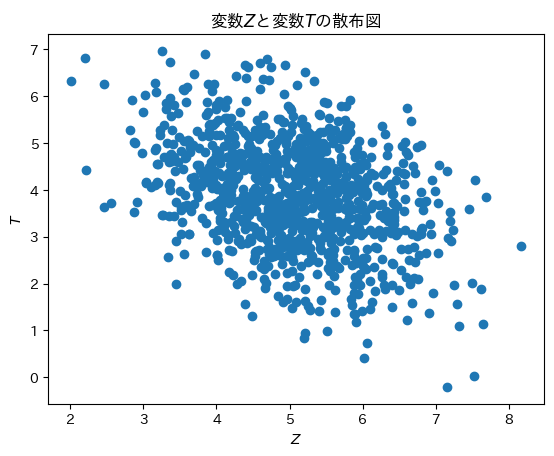

In [6]:
# 操作変数と処置変数の散布図
plt.scatter(df['Z'], df['T'])
plt.xlabel(r'$Z$')
plt.ylabel(r'$T$')
plt.title(r'変数$Z$と変数$T$の散布図');

In [7]:
print(f"操作変数と処置変数の相関係数: {np.corrcoef(df['Z'], df['T'])[0, 1]}")

操作変数と処置変数の相関係数: -0.35645931958997945


In [8]:
# 操作変数推定量による推定
Z_mean = np.mean(df['Z'])
Y_mean = np.mean(df['Y'])
T_mean = np.mean(df['T'])

beta_IV = np.sum((df['Z'] - Z_mean) * (df['Y'] - Y_mean)) / np.sum((df['Z'] - Z_mean) * (df['T'] - T_mean))
print(f"操作変数推定量による推定値: {beta_IV}")

操作変数推定量による推定値: 0.08699800740842645


In [9]:
# 2段階推定の1段階目
X = df[['Z']]
y = df['T']
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           2.50e-31
Time:                        15:15:27   Log-Likelihood:                -1474.8
No. Observations:                1000   AIC:                             2954.
Df Residuals:                     998   BIC:                             2963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0099      0.177     34.043      0.000       5.663       6.356
Z             -0.4167      0.035    -12.053      0.000      -0.485      -0.349
==============================================================================
Omnibus:                        4.275   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.173
Skew:                          -0.125   Prob(JB):                        0.124
Kurtosis:                       2.806   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Tの推定値をデータフレームに格納
df['hat_T'] = res.predict(X)

In [11]:
# 2段階推定の2段階目
X = df['hat_T']
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9880
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.320
Time:                        15:15:27   Log-Likelihood:                -1528.2
No. Observations:                1000   AIC:                             3060.
Df Residuals:                     998   BIC:                             3070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5139      0.345      7.287      0.000       1.837       3.191
hat_T          0.0870      0.088      0.994      0.320      -0.085       0.259
==============================================================================
Omnibus:                        1.541   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.402
Skew:                           0.069   Prob(JB):                        0.496
Kurtosis:                       3.120   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# フロントドア基準

In [12]:
# データの生成
n_sample = 500

X = np.random.normal(loc=0, scale=1, size=n_sample)
T = ((-0.5 + X + np.random.normal(loc=0, scale=1, size=n_sample)) > 0).astype(int)
Z = 3 + 20*T + np.random.normal(loc=0, scale=1, size=n_sample)
Y = 5 + 1.5*X + 0.3*Z + np.random.normal(loc=0, scale=1, size=n_sample)

df = pd.DataFrame({
    'X': X,
    'Z': Z,
    'T': T,
    'Y': Y
})

df.head()

,X,Z,T,Y
0,0.613349,23.309724,1,12.148159
1,1.843700,22.262544,1,15.008315
2,0.271091,1.463080,0,5.231631
3,1.136448,22.437745,1,14.141632
4,-1.738332,1.400489,0,3.053721


In [13]:
# 観測できないXと処置変数Tで重回帰分析を行った場合
X = df[['T', 'X']]
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     4156.
Date:                Mon, 15 Sep 2025   Prob (F-statistic):          5.45e-311
Time:                        15:15:27   Log-Likelihood:                -703.60
No. Observations:                 500   AIC:                             1413.
Df Residuals:                     497   BIC:                             1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8642      0.062     94.363      0.000       5.742       5.986
T              6.0336      0.111     54.293      0.000       5.815       6.252
X              1.5282      0.053     28.662      0.000       1.423       1.633
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.408
Skew:                           0.068   Prob(JB):                        0.815
Kurtosis:                       2.967   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Yを目的変数、Z, Tを説明変数とした重回帰
Z = df[['Z', 'T']]
y = df['Y']
Z = sm.add_constant(Z)
model = sm.OLS(y, Z)
res_Y = model.fit()
res_Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1452.
Date:                Mon, 15 Sep 2025   Prob (F-statistic):          2.93e-208
Time:                        15:15:27   Log-Likelihood:                -941.58
No. Observations:                 500   AIC:                             1889.
Df Residuals:                     497   BIC:                             1902.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4000      0.232     18.934      0.000       3.943       4.857
Z              0.2449      0.071      3.459      0.001       0.106       0.384
T              2.9920      1.417      2.112      0.035       0.208       5.776
==============================================================================
Omnibus:                        1.998   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                2.032
Skew:                           0.152   Prob(JB):                        0.362
Kurtosis:                       2.932   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Zを目的変数、Tを説明変数とした単回帰分析
T = df[['T']]
z = df['Z']
T = sm.add_constant(T)
model = sm.OLS(z, T)
res_Z = model.fit()
res_Z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.621e+04
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:15:27   Log-Likelihood:                -713.28
No. Observations:                 500   AIC:                             1431.
Df Residuals:                     498   BIC:                             1439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0174      0.058     52.192      0.000       2.904       3.131
T             19.8995      0.093    214.954      0.000      19.718      20.081
==============================================================================
Omnibus:                        1.158   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.164
Skew:                          -0.029   Prob(JB):                        0.559
Kurtosis:                       2.771   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# フロントドア公式によるACEの推定
print(f"フロントドア公式によるACEの推定値: {res_Y.params['Z']*res_Z.params['T']}")

フロントドア公式によるACEの推定値: 4.874275625296003
